In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

from env import host, user, password
from pydataset import data
import acquire
import prepare

# Step 1 - Acquire Data

#### Displaying and inspecting data before prepare phase

In [2]:
telco_df = acquire.get_telco_data()
telco_df.head()

,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
payment_type_id,,,,,,,,,,,,,,,,,,,,,
2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [3]:
telco_df.head().T

payment_type_id,2,2,1,1,2
contract_type_id,2,1,1,1,1
internet_service_type_id,1,1,2,2,2
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No


# Data Dictionary

## What does each column title represent?

In [4]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 2 to 1
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   contract_type_id          7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   customer_id               7043 non-null   object 
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  online_security           7043 non-null   object 
 11  online_backup             7043 non-null   object 
 12  device_protection         7043 non-null   object 
 13  tech_support              7043 non-null   object 
 14  streaming_t

### Why is total charges not a number?

# Step 2 - Prepare Data

### Here is where I will clean and prepare the data before analysis

In [5]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


## Are there any nulls?

### no missing data

In [6]:
telco_df.isna().sum()

contract_type_id            0
internet_service_type_id    0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
internet_service_type       0
contract_type               0
payment_type                0
dtype: int64

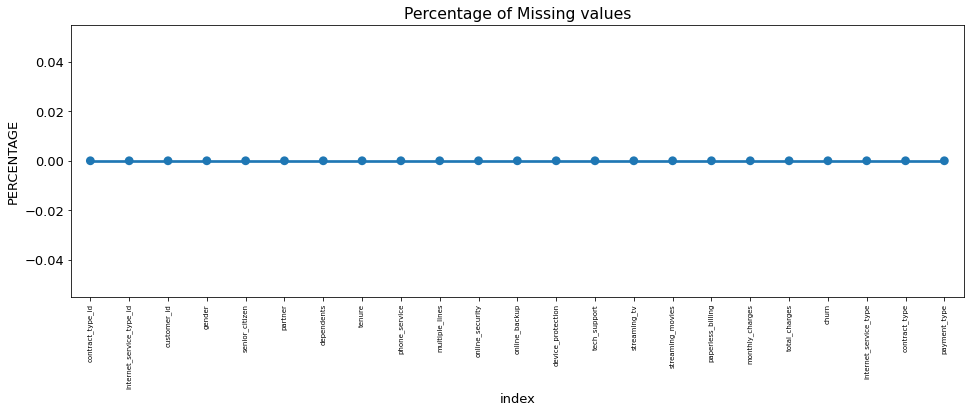

In [7]:
missing = pd.DataFrame((telco_df.isnull().sum())*100/telco_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Text(0.5, 1.02, 'Count of TARGET Variable per category')

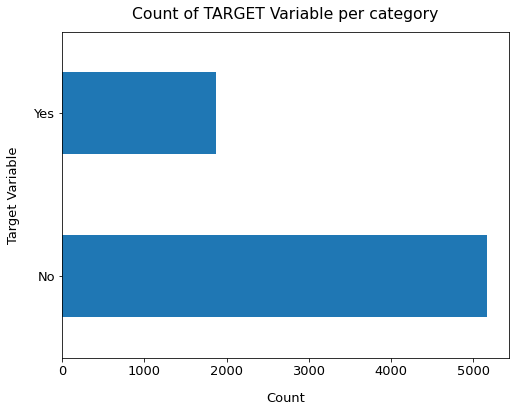

In [8]:
telco_df['churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [9]:
100*telco_df['churn'].value_counts()/len(telco_df['churn'])

No     73.463013
Yes    26.536987
Name: churn, dtype: float64

### 26.5% of customers from this data set have churned.

### How many customers have churned?

In [10]:
telco_df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

### Here I will create another df to prepare the data, find nulls, drop dupes, and columns.

In [11]:
telco_data = telco_df.copy()

### Here I will convert the total_charges column to a numeric value and find the nulls

In [12]:
telco_data.total_charges = pd.to_numeric(telco_data.total_charges, errors='coerce')
telco_data.isnull().sum()

contract_type_id             0
internet_service_type_id     0
customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
paperless_billing            0
monthly_charges              0
total_charges               11
churn                        0
internet_service_type        0
contract_type                0
payment_type                 0
dtype: int64

### What do these nulls look like?

In [13]:
telco_data.loc[telco_data ['total_charges'].isnull() == True]

,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
payment_type_id,,,,,,,,,,,,,,,,,,,,,
4,3,1,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,...,Yes,Yes,No,No,56.05,NaN,No,DSL,Two year,Credit card (automatic)
2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,No,20.00,NaN,No,None,Two year,Mailed check
3,3,1,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,...,Yes,No,No,Yes,61.90,NaN,No,DSL,Two year,Bank transfer (automatic)
2,2,3,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,Yes,19.70,NaN,No,None,One year,Mailed check
2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,No,20.25,NaN,No,None,Two year,Mailed check
2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,...,No internet service,No internet service,No internet service,No,25.35,NaN,No,None,Two year,Mailed check
2,3,1,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,...,Yes,Yes,No,No,73.35,NaN,No,DSL,Two year,Mailed check
2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,...,No internet service,No internet service,No internet service,No,25.75,NaN,No,None,Two year,Mailed check
3,3,1,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,...,Yes,Yes,No,Yes,52.55,NaN,No,DSL,Two year,Bank transfer (automatic)


### Need to move payment_type_id to column and not index

In [14]:
telco_data.reset_index(inplace=True)

### Removing null values for further preparing

In [15]:
telco_data.dropna(how = 'any', inplace = True)

### Dropping unnecessary columns and adding categories

In [16]:
#binned the tenure column and added groups.
cut_labels = ['0-12', '13-24', '25-36', '37-48','49-60','61-72']
cut_bins = [0, 12,24,36,48,60,72]
telco_data['tenure_group'] = pd.cut(telco_data['tenure'], bins=cut_bins, labels=cut_labels)
telco_data['tenure_group'].value_counts()

0-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

#### dropping columns I do not need

In [17]:
telco_data.drop(columns= ['customer_id','tenure'], axis=1, inplace=True)
telco_data.head()

,payment_type_id,contract_type_id,internet_service_type_id,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,tenure_group
0,2,2,1,Female,0,Yes,Yes,Yes,No,No,...,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check,0-12
1,2,1,1,Male,0,No,No,Yes,Yes,No,...,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check,0-12
2,1,1,2,Male,0,No,No,Yes,No,No,...,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check,0-12
3,1,1,2,Male,1,Yes,No,Yes,No,No,...,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check,13-24
4,2,1,2,Female,1,Yes,No,Yes,No,No,...,Yes,No,Yes,83.9,267.40,Yes,Fiber optic,Month-to-month,Mailed check,0-12


### Created a list of the object data types and checking the values in each

In [18]:
obj_cols = telco_data.select_dtypes(np.object).columns.tolist()

def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((telco_data[col].value_counts()/telco_data.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(obj_cols)

-----------------------------
Male      50.47
Female    49.53
Name: gender, dtype: float64
-----------------------------
-----------------------------
No     51.75
Yes    48.25
Name: partner, dtype: float64
-----------------------------
-----------------------------
No     70.15
Yes    29.85
Name: dependents, dtype: float64
-----------------------------
-----------------------------
Yes    90.33
No      9.67
Name: phone_service, dtype: float64
-----------------------------
-----------------------------
No                  48.14
Yes                 42.19
No phone service     9.67
Name: multiple_lines, dtype: float64
-----------------------------
-----------------------------
No                     49.73
Yes                    28.65
No internet service    21.62
Name: online_security, dtype: float64
-----------------------------
-----------------------------
No                     43.90
Yes                    34.49
No internet service    21.62
Name: online_backup, dtype: float64
---------

### Converting total_charges to float

In [19]:
telco_data['total_charges'] = pd.to_numeric(telco_data['total_charges'],errors='coerce')

In [20]:
numcols = [col for col in telco_data.columns if telco_data[col].dtype !='O']
numcols

['payment_type_id',
 'contract_type_id',
 'internet_service_type_id',
 'senior_citizen',
 'monthly_charges',
 'total_charges',
 'tenure_group']

### Convert Senior Citizen to Yes or No

In [21]:
telco_data['senior_citizen'] = telco_data['senior_citizen'].map({0:'No',1:'Yes'})
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   payment_type_id           7032 non-null   int64   
 1   contract_type_id          7032 non-null   int64   
 2   internet_service_type_id  7032 non-null   int64   
 3   gender                    7032 non-null   object  
 4   senior_citizen            7032 non-null   object  
 5   partner                   7032 non-null   object  
 6   dependents                7032 non-null   object  
 7   phone_service             7032 non-null   object  
 8   multiple_lines            7032 non-null   object  
 9   online_security           7032 non-null   object  
 10  online_backup             7032 non-null   object  
 11  device_protection         7032 non-null   object  
 12  tech_support              7032 non-null   object  
 13  streaming_tv              7032 non-null   object

payment_type_id


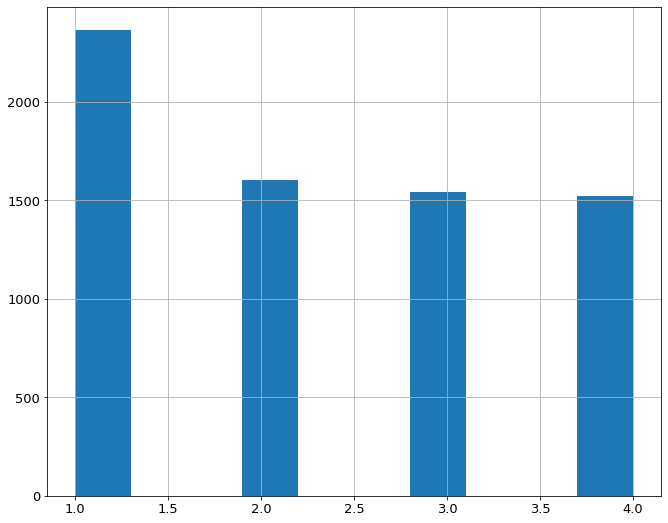

contract_type_id


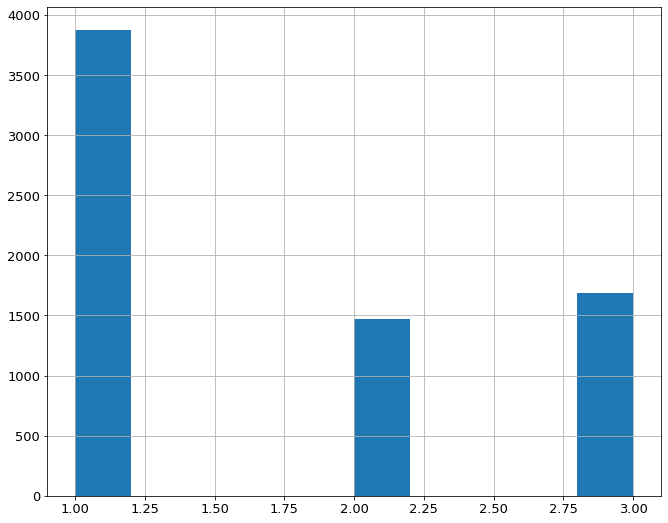

internet_service_type_id


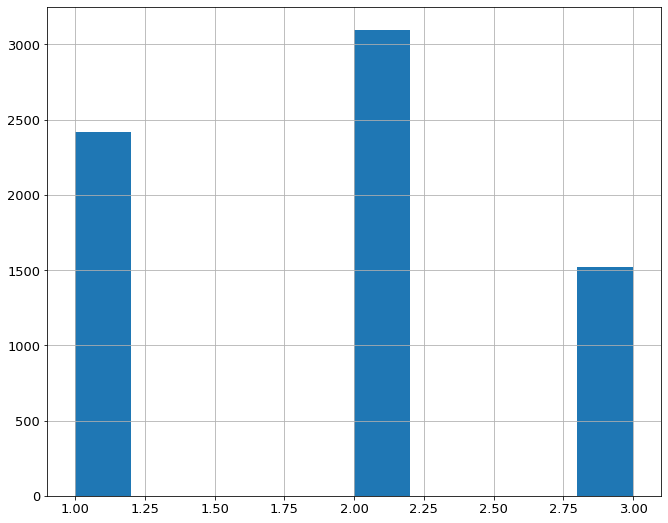

senior_citizen


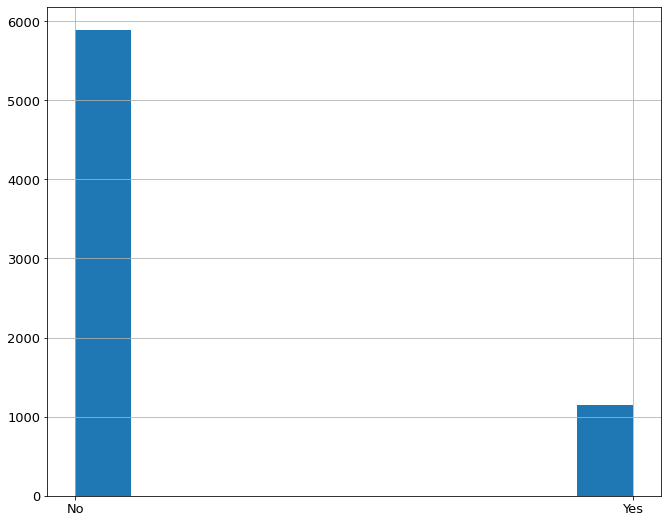

monthly_charges


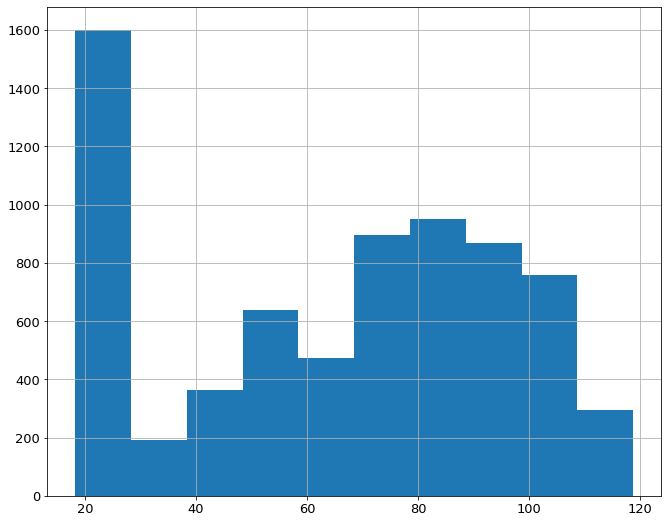

total_charges


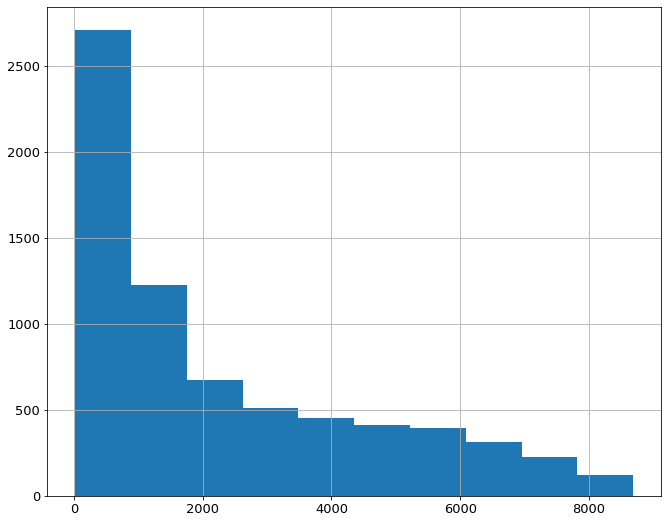

tenure_group


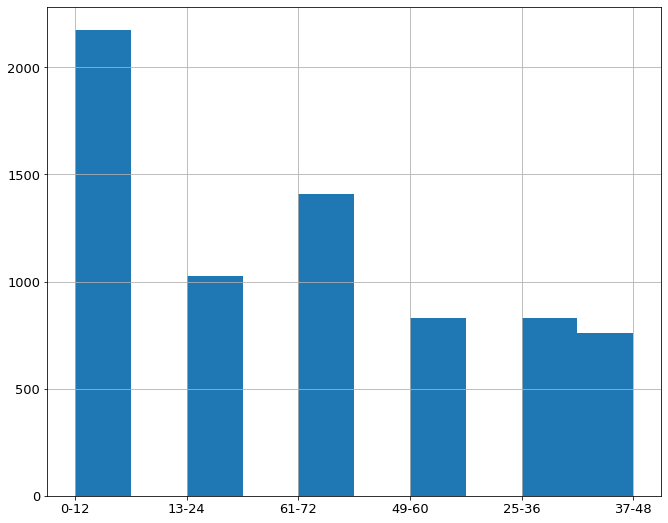

In [22]:
#histograms of numeric columns
for col in numcols:
    print(col)
    telco_data[col].hist()
    plt.show()

In [23]:
catcols = [col for col in telco_data.columns if telco_data[col].dtype == 'O']

In [24]:
catcols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [25]:
# Describe the object columns
for col in catcols:
    print(f"Column: {col}")
    print(telco_data[col].value_counts())
    print("--------")
    print(telco_data[col].value_counts(normalize=True, dropna=False))
    print("=================")

Column: gender
Male      3549
Female    3483
Name: gender, dtype: int64
--------
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
Column: senior_citizen
No     5890
Yes    1142
Name: senior_citizen, dtype: int64
--------
No     0.8376
Yes    0.1624
Name: senior_citizen, dtype: float64
Column: partner
No     3639
Yes    3393
Name: partner, dtype: int64
--------
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
Column: dependents
No     4933
Yes    2099
Name: dependents, dtype: int64
--------
No     0.701507
Yes    0.298493
Name: dependents, dtype: float64
Column: phone_service
Yes    6352
No      680
Name: phone_service, dtype: int64
--------
Yes    0.903299
No     0.096701
Name: phone_service, dtype: float64
Column: multiple_lines
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
--------
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: multiple_lines, d

### Are there any dupes?

In [26]:
telco_data.shape 

(7032, 23)

In [27]:
telco_data.drop_duplicates(inplace=True)

In [28]:
telco_data.shape

(7010, 23)

In [29]:
telco_data.head()

,payment_type_id,contract_type_id,internet_service_type_id,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,tenure_group
0,2,2,1,Female,No,Yes,Yes,Yes,No,No,...,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check,0-12
1,2,1,1,Male,No,No,No,Yes,Yes,No,...,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check,0-12
2,1,1,2,Male,No,No,No,Yes,No,No,...,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check,0-12
3,1,1,2,Male,Yes,Yes,No,Yes,No,No,...,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check,13-24
4,2,1,2,Female,Yes,Yes,No,Yes,No,No,...,Yes,No,Yes,83.9,267.40,Yes,Fiber optic,Month-to-month,Mailed check,0-12


# Label Encoding

# Split Data

In [30]:
def split_data(telco_data):
    '''
    Takes in the telco_data and returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(telco_data, test_size=.2, 
                                        random_state=123, 
                                        stratify=telco_data.churn)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [31]:
 train, validate, test = split_data(telco_data)

In [32]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3925, 23)
validate -> (1683, 23)
test -> (1402, 23)


# Data Exploration

## Univariate Analysis
### Plot distibution of individual predictors by churn

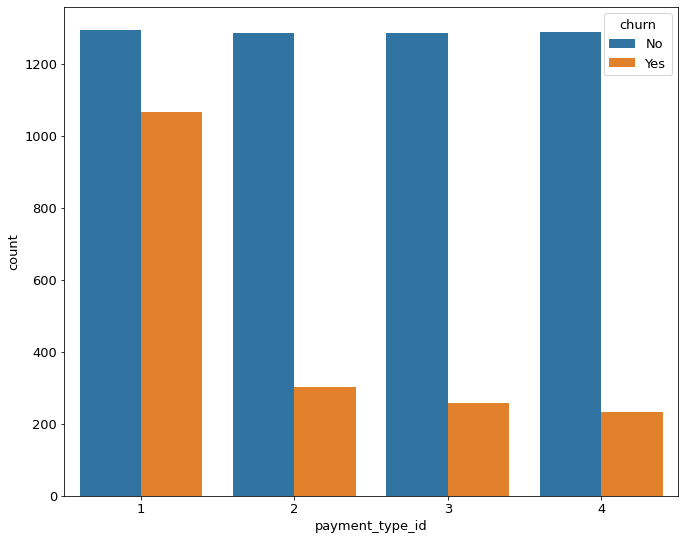

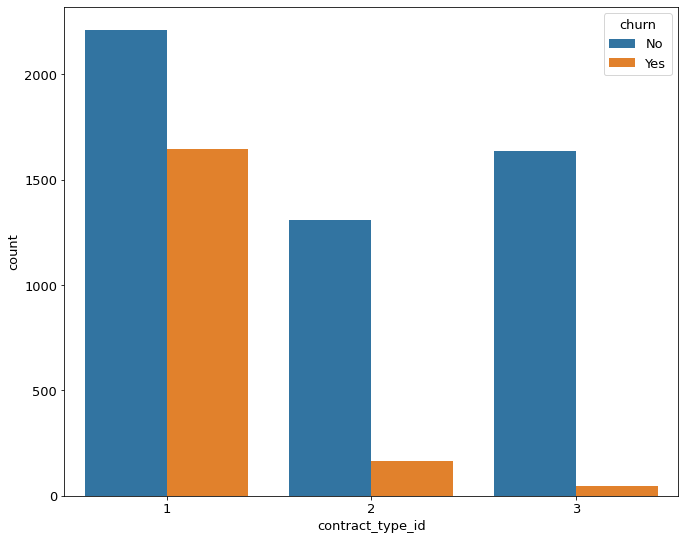

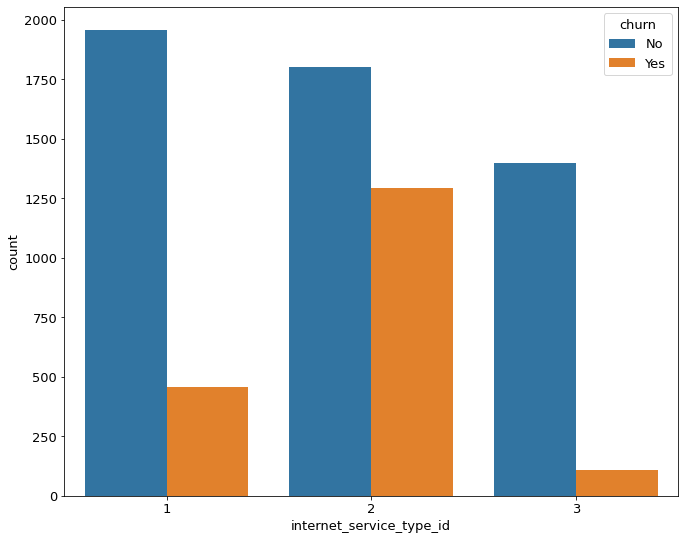

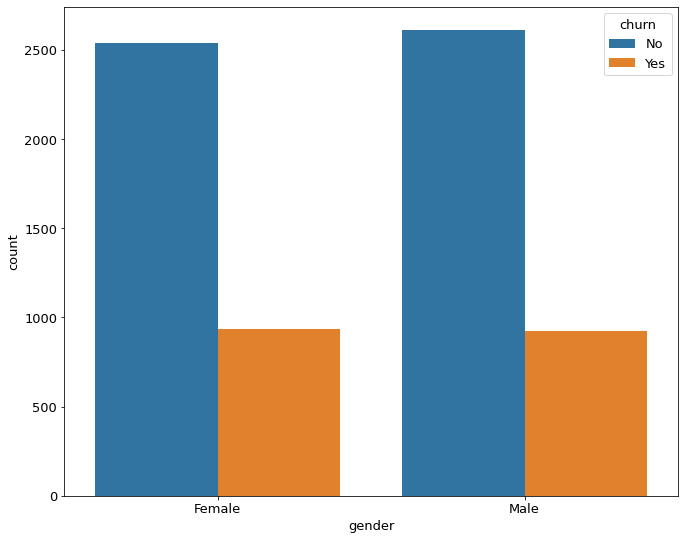

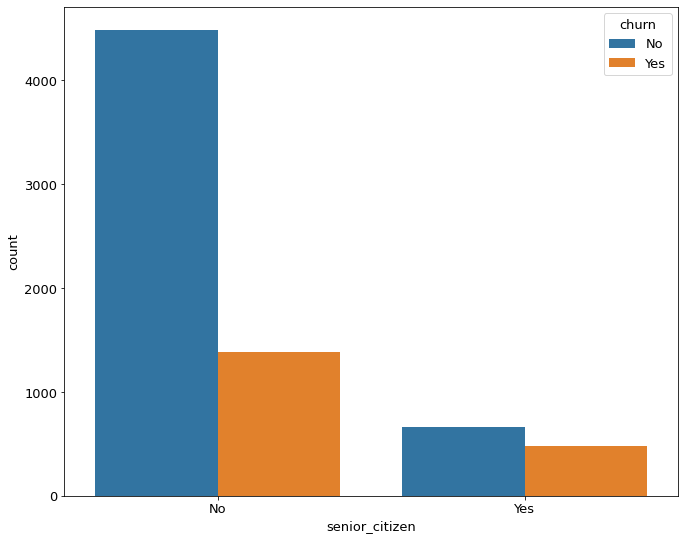

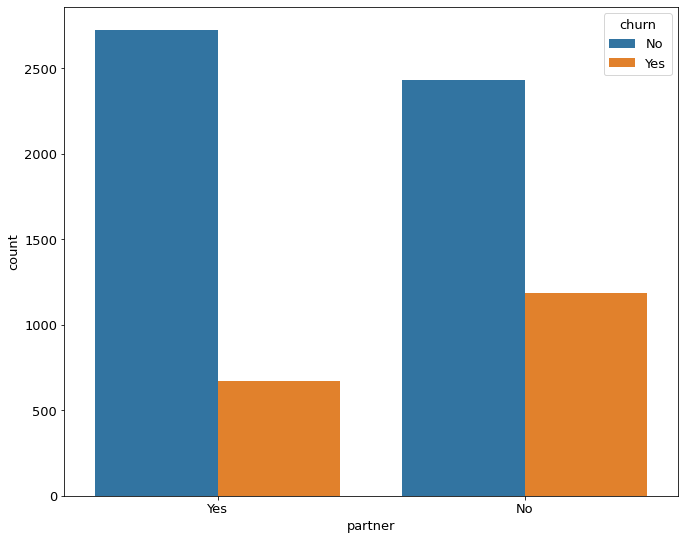

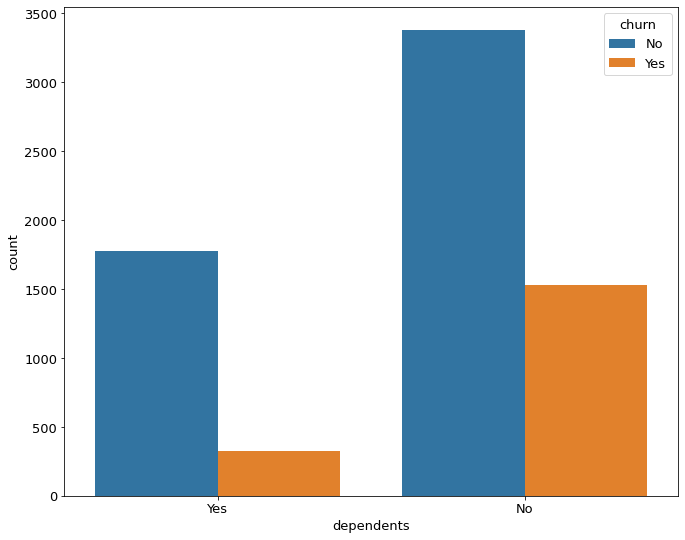

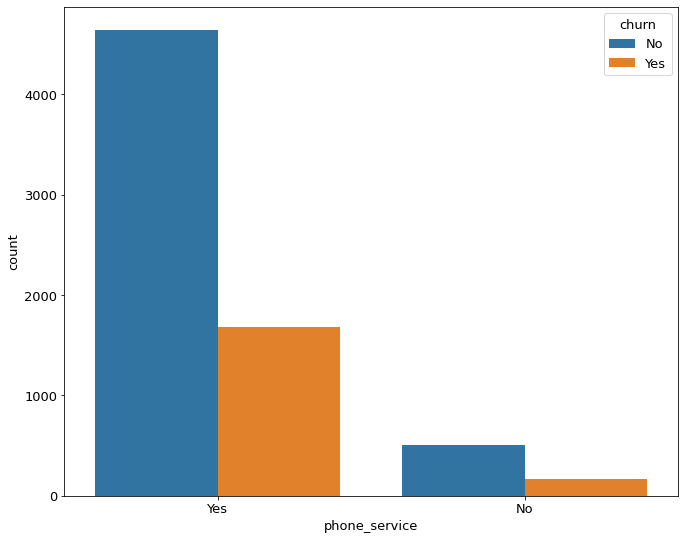

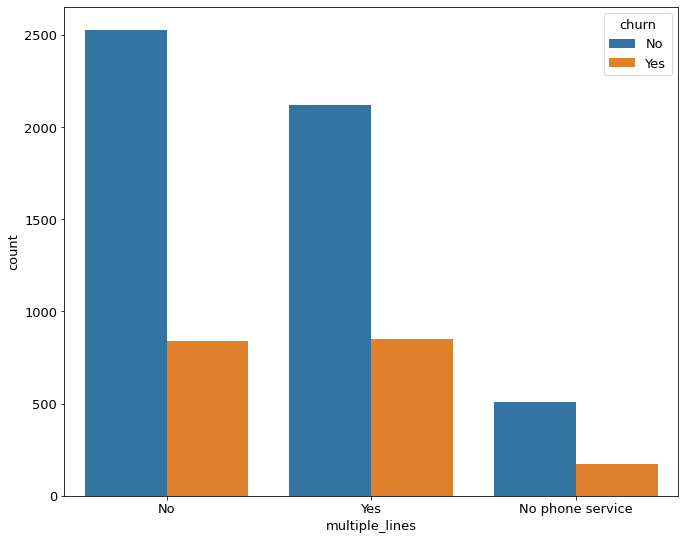

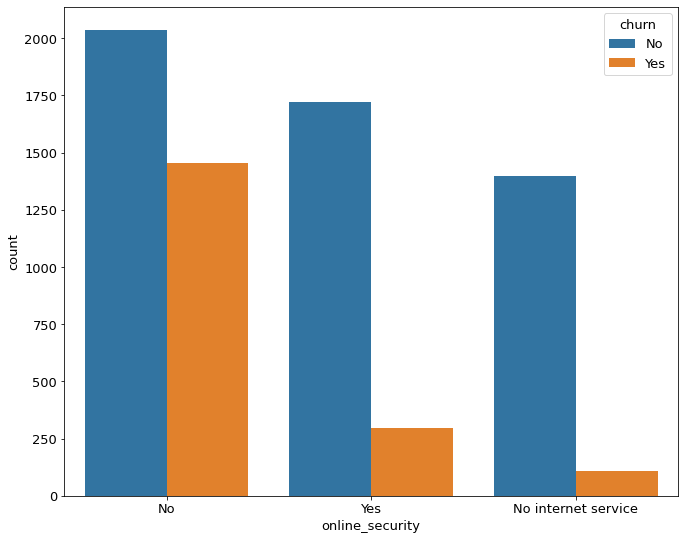

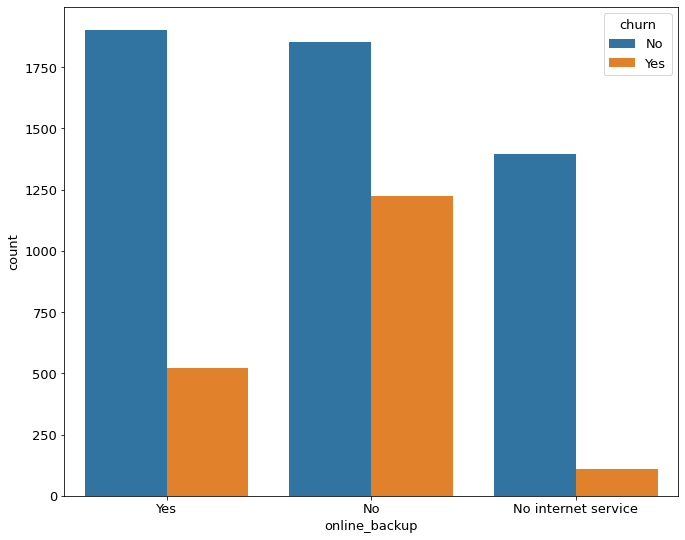

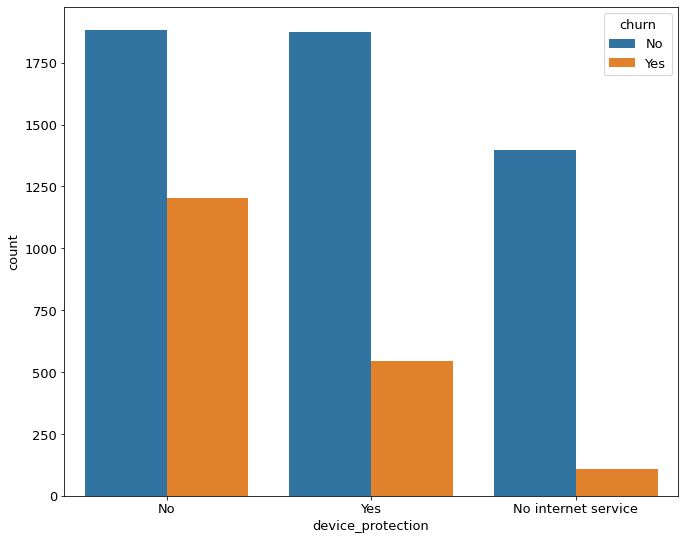

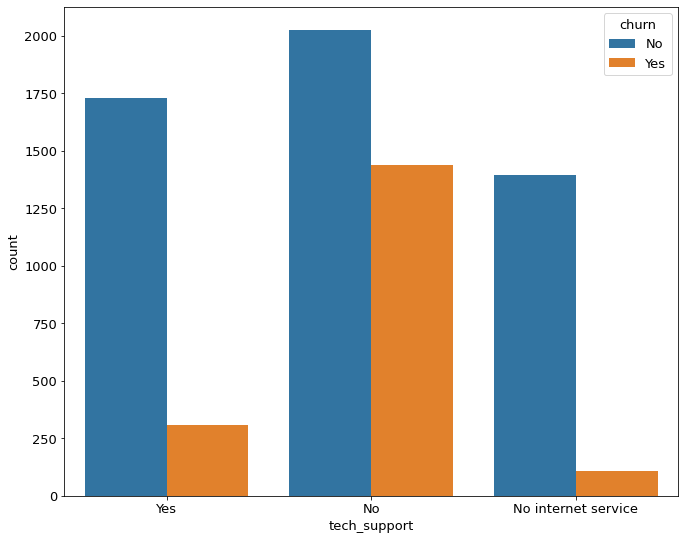

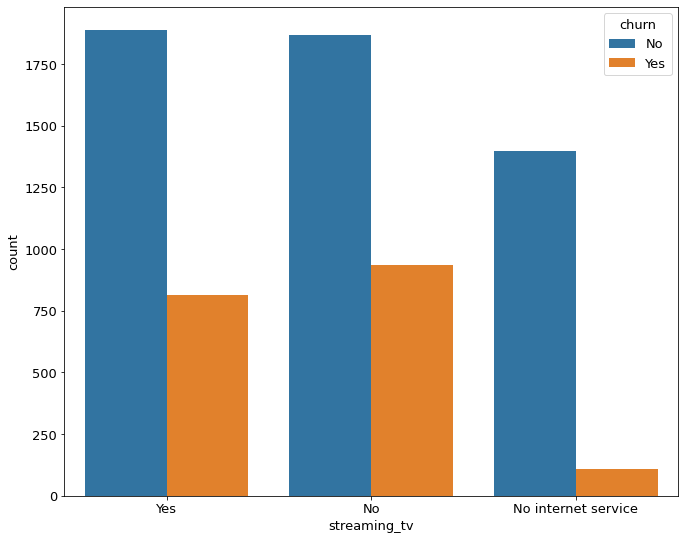

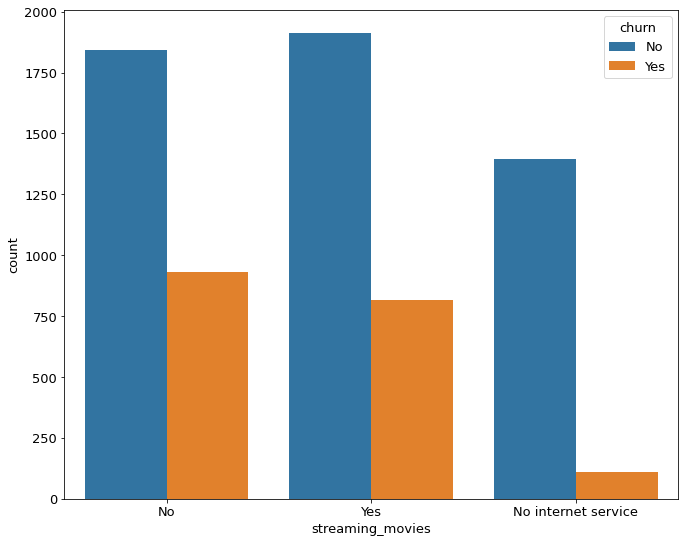

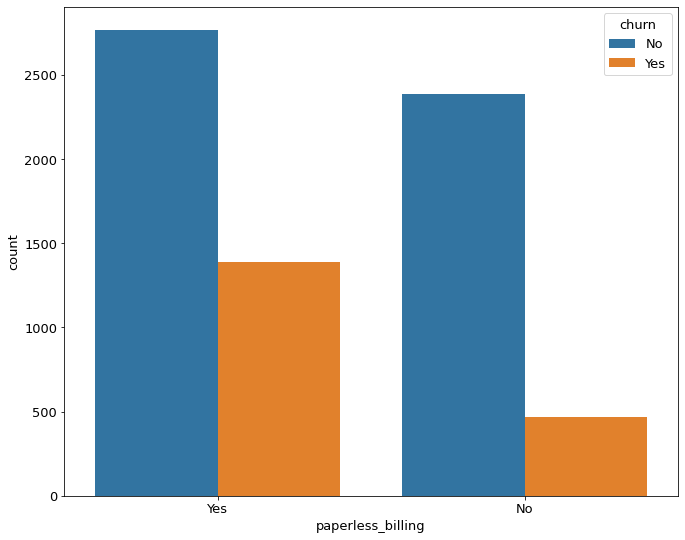

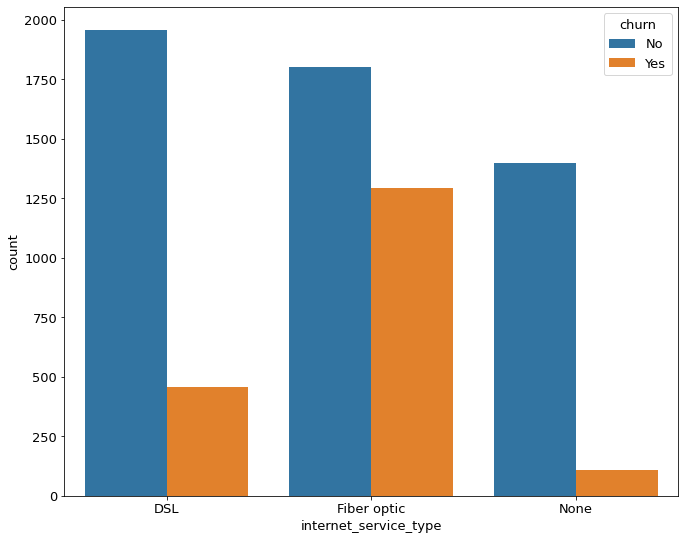

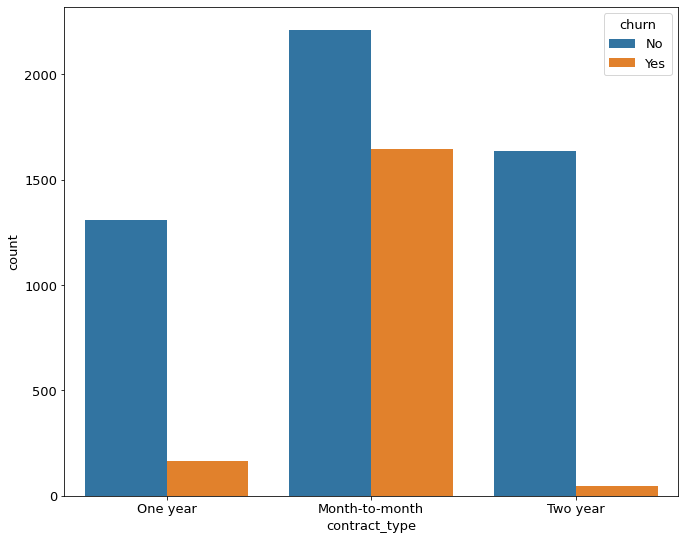

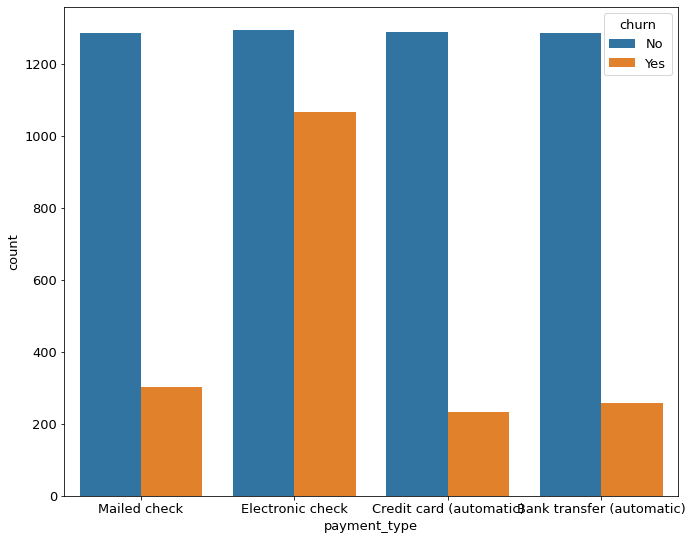

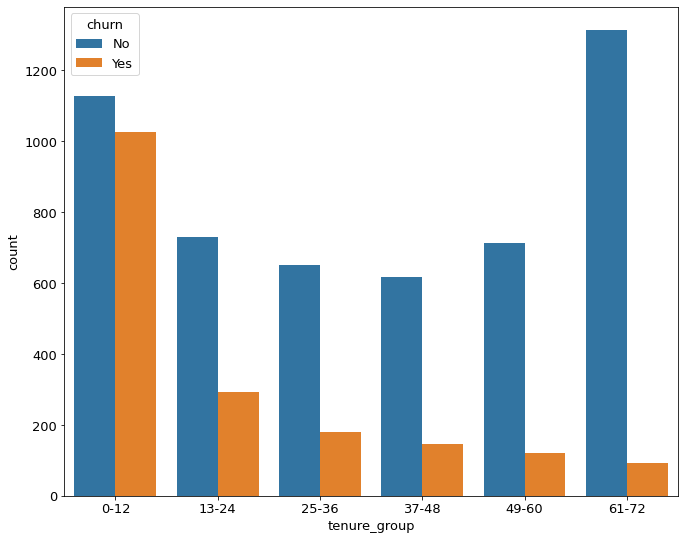

In [33]:
for i, predictor in enumerate(telco_data.drop(columns=['churn', 'total_charges', 'monthly_charges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='churn')

### Convert churn to numeric

In [34]:
telco_data['churn'] = np.where(telco_data.churn == 'Yes',1,0)
telco_data.head()

,payment_type_id,contract_type_id,internet_service_type_id,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,tenure_group
0,2,2,1,Female,No,Yes,Yes,Yes,No,No,...,Yes,No,Yes,65.6,593.30,0,DSL,One year,Mailed check,0-12
1,2,1,1,Male,No,No,No,Yes,Yes,No,...,No,Yes,No,59.9,542.40,0,DSL,Month-to-month,Mailed check,0-12
2,1,1,2,Male,No,No,No,Yes,No,No,...,No,No,Yes,73.9,280.85,1,Fiber optic,Month-to-month,Electronic check,0-12
3,1,1,2,Male,Yes,Yes,No,Yes,No,No,...,Yes,Yes,Yes,98.0,1237.85,1,Fiber optic,Month-to-month,Electronic check,13-24
4,2,1,2,Female,Yes,Yes,No,Yes,No,No,...,Yes,No,Yes,83.9,267.40,1,Fiber optic,Month-to-month,Mailed check,0-12


### Converting categorical into dummies

In [35]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,payment_type_id,contract_type_id,internet_service_type_id,monthly_charges,total_charges,churn,gender_Female,gender_Male,senior_citizen_No,senior_citizen_Yes,...,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_group_0-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,2,2,1,65.6,593.30,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,2,1,1,59.9,542.40,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2,1,1,2,73.9,280.85,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,1,1,2,98.0,1237.85,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
4,2,1,2,83.9,267.40,1,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


### Relationship between Monthly Charges and Total Charges

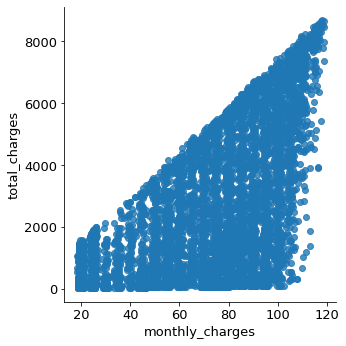

In [36]:
sns.lmplot(data=telco_data_dummies, x='monthly_charges', y='total_charges', fit_reg=False)

### Obviously total charges increase as monthly charges increase

Text(0.5, 1.0, 'Monthly charges by churn')

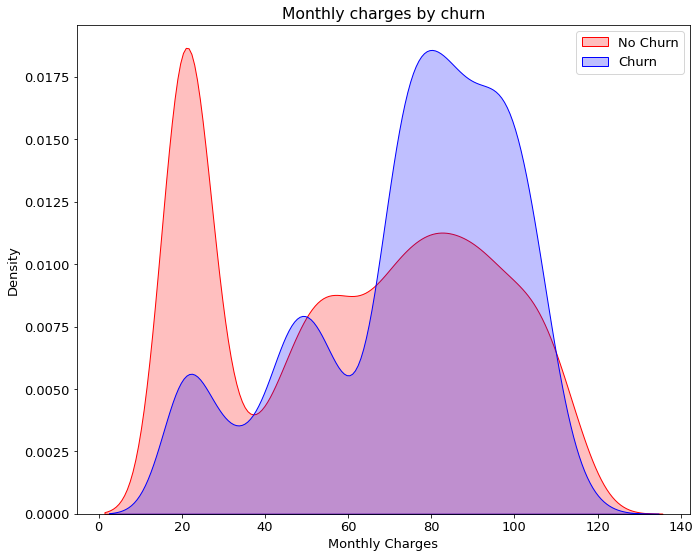

In [37]:
Mth = sns.kdeplot(telco_data_dummies.monthly_charges[(telco_data_dummies["churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.monthly_charges[(telco_data_dummies["churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

### As expected churn is high when monthly charges are high

Text(0.5, 1.0, 'Total charges by churn')

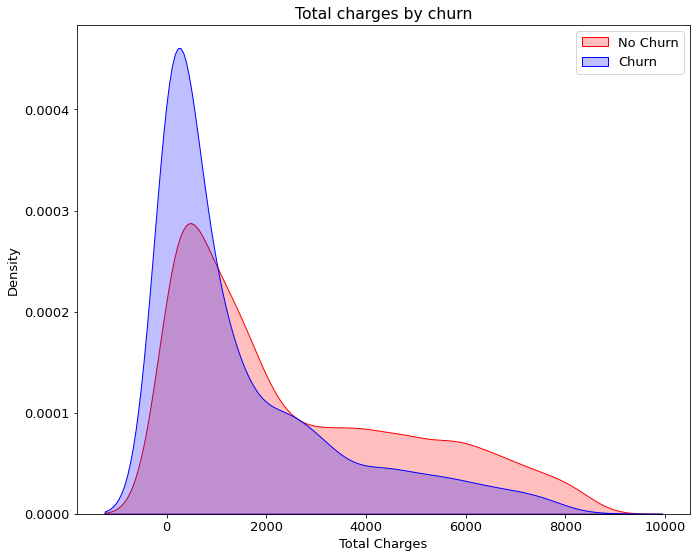

In [38]:
Tot = sns.kdeplot(telco_data_dummies.total_charges[(telco_data_dummies["churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.total_charges[(telco_data_dummies["churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')